In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df =pd.read_csv("./WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


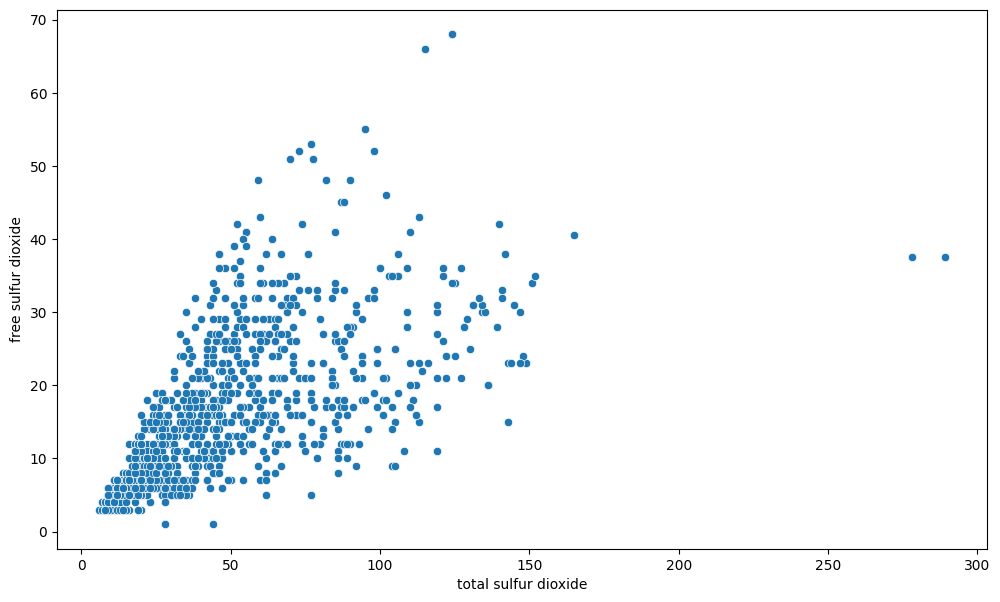

In [5]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='total sulfur dioxide',y='free sulfur dioxide',data=df)
plt.show()

<Axes: xlabel='density', ylabel='fixed acidity'>

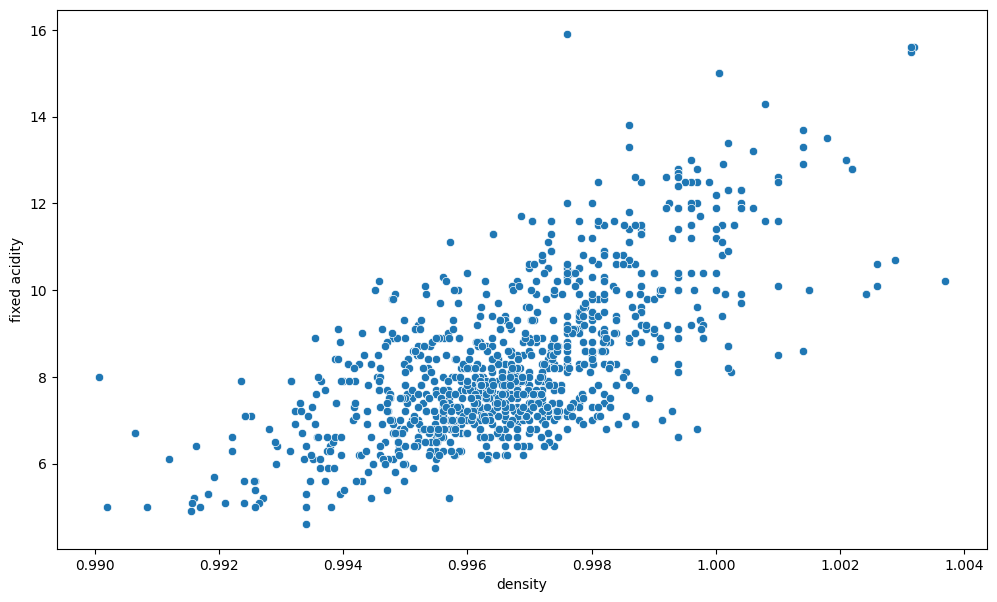

In [7]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='density',y='fixed acidity',data=df)

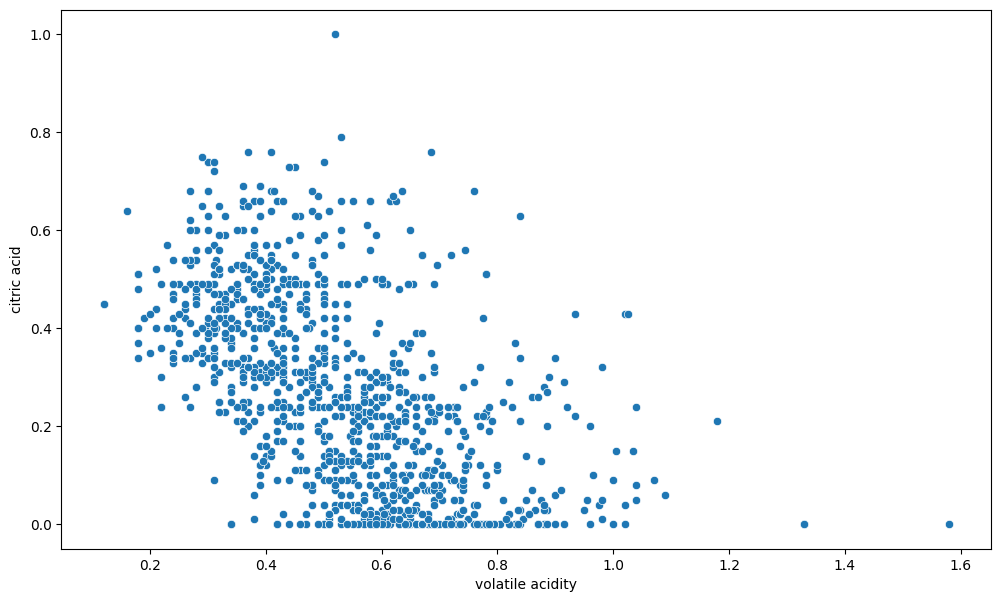

In [9]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='volatile acidity',y='citric acid',data=df)
plt.show()

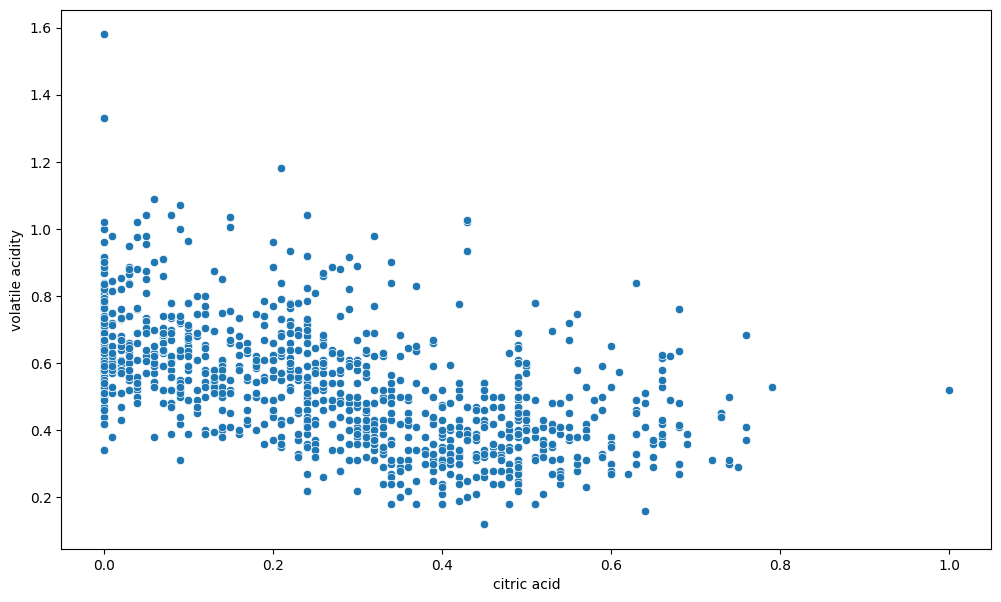

In [11]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='citric acid',y='volatile acidity',data=df)
plt.show()

In [33]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [35]:

df_binned = df.copy()
for col in df_binned.columns[:-1]:  
    df_binned[col] = pd.qcut(df_binned[col], q=3, labels=["Low", "Medium", "High"])


df_encoded = pd.get_dummies(df_binned).astype(bool)


frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)


rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                 antecedents  \
0                       (Id)   
1     (fixed acidity_Medium)   
2                       (Id)   
3       (fixed acidity_High)   
4                       (Id)   
...                      ...   
3773                    (Id)   
3774    (fixed acidity_High)   
3775                (pH_Low)   
3776          (density_High)   
3777      (citric acid_High)   

                                            consequents   support  confidence  \
0                                (fixed acidity_Medium)  0.321085    0.321366   
1                                                  (Id)  0.321085    1.000000   
2                                  (fixed acidity_High)  0.324584    0.324869   
3                                                  (Id)  0.324584    1.000000   
4                                (volatile acidity_Low)  0.336833    0.337128   
...                                                 ...       ...         ...   
3773  (density_High, citric acid_High, fixed aci

In [17]:
feature=np.array(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
label=np.array(df['quality'])

xtrain,xtest,ytrain,ytest=train_test_split(feature,label,test_size=0.2,random_state=0)

In [19]:
model_comp={}
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
y2=dt.predict(xtest)

print(accuracy_score(ytest,y2))
print(f1_score(ytest,y2,average='weighted'))
print(classification_report(ytest,y2))

model_comp['decision tree']=[accuracy_score(y2,ytest),f1_score(ytest,y2,average='weighted')]

0.5502183406113537
0.5556149424130831
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.66      0.63      0.64       100
           6       0.56      0.58      0.57        92
           7       0.39      0.33      0.36        27
           8       0.33      0.50      0.40         2

    accuracy                           0.55       229
   macro avg       0.32      0.34      0.33       229
weighted avg       0.56      0.55      0.56       229



In [21]:
lgr=LogisticRegression()
lgr.fit(xtrain,ytrain)
y1=lgr.predict(xtest)
print(accuracy_score(ytest,y1))
print(f1_score(ytest,y1,average='weighted'))
print(classification_report(ytest,y1))

model_comp['logistic regression']=[accuracy_score(y1,ytest),f1_score(ytest,y1,average='weighted')]

0.6550218340611353
0.5983266470219287
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.72      0.84      0.78       100
           6       0.58      0.72      0.64        92
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.22      0.26      0.24       229
weighted avg       0.55      0.66      0.60       229



In [23]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
y3=rf.predict(xtest)

print(accuracy_score(ytest,y3))
print(f1_score(ytest,y3,average='weighted'))
print(classification_report(ytest,y3))


model_comp['Random forest']=[accuracy_score(y3,ytest),f1_score(ytest,y3,average='weighted')]

0.6986899563318777
0.6815213317624575
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.75      0.78      0.76       100
           6       0.65      0.74      0.69        92
           7       0.70      0.52      0.60        27
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.35      0.34      0.34       229
weighted avg       0.67      0.70      0.68       229



In [25]:
k=KNeighborsClassifier()
k.fit(xtrain,ytrain)
y4=k.predict(xtest)

print(accuracy_score(ytest,y4))
print(f1_score(ytest,y4,average='weighted'))
print(classification_report(ytest,y4))

model_comp['KNN']=[accuracy_score(y4,ytest),f1_score(ytest,y4,average='weighted')]

0.5021834061135371
0.4866528111840211
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.54      0.63      0.58       100
           6       0.45      0.47      0.46        92
           7       0.50      0.33      0.40        27
           8       0.00      0.00      0.00         2

    accuracy                           0.50       229
   macro avg       0.25      0.24      0.24       229
weighted avg       0.48      0.50      0.49       229



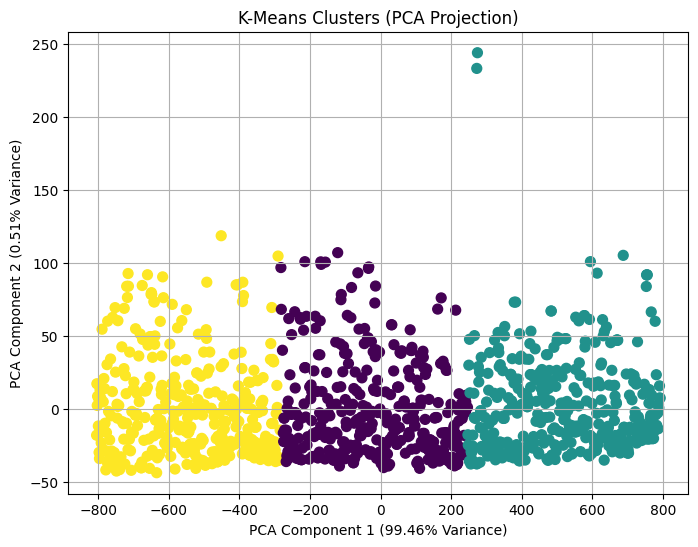

In [37]:

X = df.drop('quality', axis=1)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

X_clustered = X.copy()
X_clustered['KMeans_Cluster'] = kmeans_labels

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel(f"PCA Component 1 ({explained_variance[0]*100:.2f}% Variance)")
plt.ylabel(f"PCA Component 2 ({explained_variance[1]*100:.2f}% Variance)")
plt.grid(True)
plt.show()

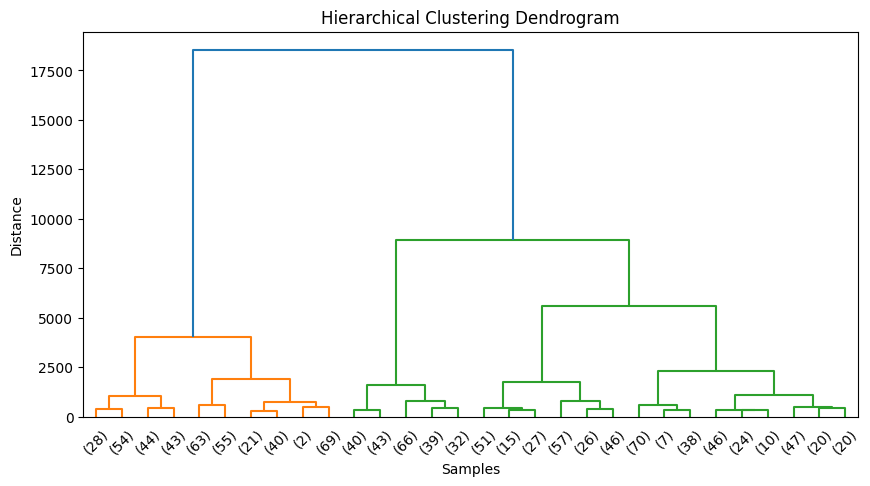

Hierarchical Clustering Done.


In [29]:

from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

# Dendrogram for Hierarchical Clustering
import matplotlib.pyplot as plt

linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X)
X_clustered['Hierarchical_Cluster'] = agglo_labels
print("Hierarchical Clustering Done.")


DBSCAN Clustering Done. Noise points: 1143


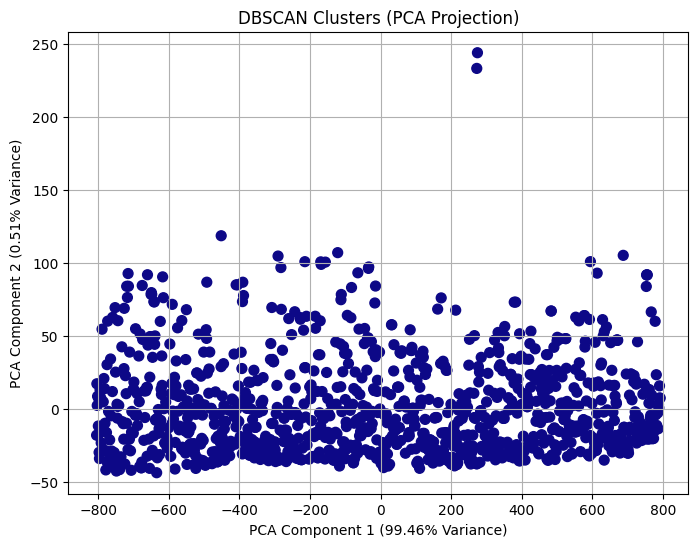

In [39]:


# Prepare features by dropping the target label
X = df.drop('quality', axis=1)

# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Add cluster labels to the dataset
X_clustered = X.copy()
X_clustered['DBSCAN_Cluster'] = dbscan_labels

# Count number of noise points
n_noise = list(dbscan_labels).count(-1)
print(f"DBSCAN Clustering Done. Noise points: {n_noise}")

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='plasma', s=50)
plt.title("DBSCAN Clusters (PCA Projection)")
plt.xlabel(f"PCA Component 1 ({explained_variance[0]*100:.2f}% Variance)")
plt.ylabel(f"PCA Component 2 ({explained_variance[1]*100:.2f}% Variance)")
plt.grid(True)
plt.show()